In [0]:
from google.colab import files

uploaded = files.upload()

Saving Condrea_A_Florin_train.csv to Condrea_A_Florin_train.csv


1. Download Data
2. Visualize data
3. Preprocess Data 
4. Create predictor for missing weights
5. Train predictor with predicted weights, without weights, without weight-less entries

In [0]:
import pandas as pd
for i in uploaded:
  Info = pd.read_csv(i)


In [0]:
# Discarding Owner Name,being not relevant
# Turning 

Info = Info[["Weight(g)","Height(cm)","Energy level","Attention Needs", "Coat Lenght","Sex","Breed Name","Longevity(yrs)"]]  
print(Info)

      Weight(g)  Height(cm) Energy level Attention Needs Coat Lenght     Sex  \
0     7801.1483     21.1423         high             med       short  female   
1    43887.1576     63.5193          med            high       short  female   
2    10356.6510         NaN         high             med       short  female   
3    17832.2871     52.1902          med             med         med    male   
4    45539.3608     60.6652          med            high       short  female   
5     7321.9461     21.1201         high             med       short  female   
6    20640.1181         NaN          med             med         med    male   
7    20529.5942     48.0000         high            high       short  female   
8     8485.7079         NaN         high             low       short    male   
9    22062.8285         NaN         high            high       short  female   
10   47194.2458     64.3130          med            high       short    male   
11    6544.7142     20.8684         high

We will create a predictor in order to estimate the missing heights and later test if using predicted values lead to better results.

0.9913292300513898


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


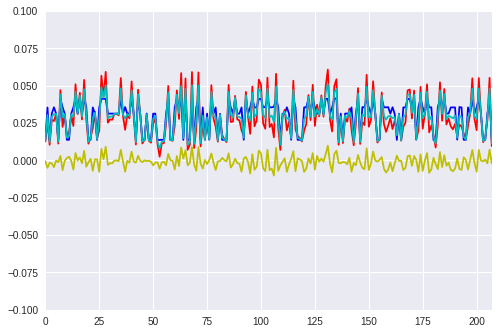

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Split data between null and not null heights
# Normalizing data
null_info = Info[Info.isnull().any(axis=1)]

# null_info = pd.get_dummies(null_info)
# null_info["Weight(g)"] = preprocessing.normalize([null_info["Weight(g)"]]).reshape(-1)
# null_info["Longevity(yrs)"] = preprocessing.normalize([null_info["Longevity(yrs)"]]).reshape(-1)
# Normalizing data
not_null_info = Info[Info.notnull().all(axis=1)]
# not_null_info = pd.get_dummies(not_null_info)
# not_null_info["Weight(g)"] = preprocessing.normalize([not_null_info["Weight(g)"]]).reshape(-1)
# not_null_info["Longevity(yrs)"] = preprocessing.normalize([not_null_info["Longevity(yrs)"]]).reshape(-1)
# Setting up data
X = not_null_info
Y = X[["Height(cm)"]]
X = X.drop(["Height(cm)"],axis=1)
# one hot data, bringing test score from 0.85 to 0.99
X = pd.get_dummies(X)
X["Weight(g)"] = preprocessing.normalize([X["Weight(g)"]]).reshape(-1)
X["Longevity(yrs)"] = preprocessing.normalize([X["Longevity(yrs)"]]).reshape(-1)

# build model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test,y_test))
# Model has a score of 99.13, indicating that it would be a solution for the missing data

X_to_predict = null_info.drop(["Height(cm)"],axis=1)
X_to_predict = pd.get_dummies(X_to_predict)
X_to_predict["Weight(g)"] = preprocessing.normalize([X_to_predict["Weight(g)"]]).reshape(-1)
X_to_predict["Longevity(yrs)"] = preprocessing.normalize([X_to_predict["Longevity(yrs)"]]).reshape(-1)




pred = reg.predict(X_to_predict).reshape(-1)

null_info["Height(cm)"] = pred

info_with_pred = pd.concat([null_info, not_null_info],ignore_index=True)
info_without_nulls = not_null_info
info_without_Heights = null_info.drop("Height(cm)",axis=1)


# Further data extracting through data whitening didn't result features less corelated

a = preprocessing.normalize([info_with_pred["Weight(g)"]]).reshape(-1)
b = preprocessing.normalize([info_with_pred["Height(cm)"]]).reshape(-1)
plt.plot(a,'r')
plt.plot(b,'b')
plt.plot((a-b)/2,'y')
plt.plot((a+b)/2,'c')

plt.axis([0, 207, -0.1, 0.1])
plt.show()

Visualize data. It can be obverved that height and weight are corelated, but at the same time form clusters. Simple data withening proved inefficient.

In the diagram bellow it can be observed that the 4 classes are liniary separable.


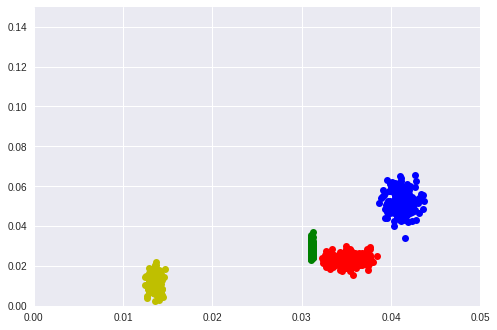

In [0]:
import matplotlib.pyplot as plt

info_with_pred_aux = info_with_pred.copy()
info_with_pred_aux["Height(cm)"] = preprocessing.normalize([info_with_pred["Height(cm)"]]).reshape(-1)
info_with_pred_aux["Weight(g)"]  = preprocessing.normalize([info_with_pred["Weight(g)"]]).reshape(-1)

dim1 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Siberian Husky"]["Height(cm)"]]
dim2 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Siberian Husky"]["Weight(g)"]]
plt.plot(dim1,dim2, 'ro')

dim1 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Dalmatian"]["Height(cm)"]]
dim2 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Dalmatian"]["Weight(g)"]]
plt.plot(dim1,dim2, 'go')

dim1 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Bloodhound"]["Height(cm)"]]
dim2 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Bloodhound"]["Weight(g)"]]
plt.plot(dim1,dim2, 'bo')

dim1 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Daschhund"]["Height(cm)"]]
dim2 = [info_with_pred_aux[info_with_pred_aux["Breed Name"]=="Daschhund"]["Weight(g)"]]
plt.plot(dim1,dim2, 'yo')

plt.axis([0, 0.05, 0, 0.15])
plt.show()

Testing all 3 datasets generated from the given data.

In [0]:
# Classifier for info_without_nulls
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(info_without_nulls.drop(['Breed Name','Longevity(yrs)'],axis=1))
Y = info_without_nulls['Breed Name']

LogReg = LogisticRegression()
LogReg_param = {}
LogReg_clf = GridSearchCV(LogReg, LogReg_param,cv=3,return_train_score=True)
LogReg_clf.fit(X, Y)
result_LogReg = LogReg_clf.cv_results_
for i in result_LogReg:
  print(str(i)+" "+str(result_LogReg[i]))
  
print("---------------------------------------------------")
RandomForest = RandomForestClassifier()
RandomForest_param = {'n_estimators':[10,50,100,200]}
RandomForest_clf = GridSearchCV(RandomForest, RandomForest_param,cv=3,return_train_score=True)
RandomForest_clf.fit(X, Y)
result_RandomForest = RandomForest_clf.cv_results_
for i in result_RandomForest:
  print(str(i)+" "+str(result_RandomForest[i]))
  
print("---------------------------------------------------")
KNN = KNeighborsClassifier()
KNN_param = {'n_neighbors':[1,2,3,4,5,7]}
KNN_clf = GridSearchCV(KNN, KNN_param,cv=3,return_train_score=True)
KNN_clf.fit(X, Y)
result_KNN = KNN_clf.cv_results_
for i in result_KNN:
  print(str(i)+" "+str(result_KNN[i]))

mean_fit_time [0.01424956]
std_fit_time [0.00093238]
mean_score_time [0.00101606]
std_score_time [3.72809887e-05]
params [{}]
split0_test_score [0.85338346]
split1_test_score [0.91698113]
split2_test_score [0.91984733]
mean_test_score [0.89659521]
std_test_score [0.03072215]
rank_test_score [1]
split0_train_score [0.89373814]
split1_train_score [0.91477273]
split2_train_score [0.93032015]
mean_train_score [0.91294367]
std_train_score [0.01499044]
---------------------------------------------------
mean_fit_time [0.01640447 0.06871732 0.14318705 0.26755889]
std_fit_time [0.00150956 0.00168126 0.00649768 0.00577833]
mean_score_time [0.00176922 0.00447663 0.00813325 0.01444157]
std_score_time [1.77418598e-05 6.33734144e-05 4.54865674e-04 1.77451595e-04]
param_n_estimators [10 50 100 200]
params [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}]
split0_test_score [1. 1. 1. 1.]
split1_test_score [0.99622642 1.         1.         1.        ]
split2_tes

In [0]:
# Classifier for info_with_pred
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(info_with_pred.drop(['Breed Name','Longevity(yrs)'],axis=1))
Y = info_with_pred['Breed Name']

LogReg = LogisticRegression()
LogReg_param = {}
LogReg_clf = GridSearchCV(LogReg, LogReg_param,cv=3,return_train_score=True)
LogReg_clf.fit(X, Y)
result_LogReg = LogReg_clf.cv_results_
for i in result_LogReg:
  print(str(i)+" "+str(result_LogReg[i]))
  
print("---------------------------------------------------")
RandomForest = RandomForestClassifier()
RandomForest_param = {'n_estimators':[10,50,100,200]}
RandomForest_clf = GridSearchCV(RandomForest, RandomForest_param,cv=3,return_train_score=True)
RandomForest_clf.fit(X, Y)
result_RandomForest = RandomForest_clf.cv_results_
for i in result_RandomForest:
  print(str(i)+" "+str(result_RandomForest[i]))
  
print("---------------------------------------------------")
KNN = KNeighborsClassifier()
KNN_param = {'n_neighbors':[1,2,3,4,5,7]}
KNN_clf = GridSearchCV(KNN, KNN_param,cv=3,return_train_score=True)
KNN_clf.fit(X, Y)
result_KNN = KNN_clf.cv_results_
for i in result_KNN:
  print(str(i)+" "+str(result_KNN[i]))

mean_fit_time [0.01734821]
std_fit_time [0.00129865]
mean_score_time [0.00094922]
std_score_time [4.21024679e-05]
params [{}]
split0_test_score [0.88656716]
split1_test_score [0.86186186]
split2_test_score [0.90361446]
mean_test_score [0.884]
std_test_score [0.01712132]
rank_test_score [1]
split0_train_score [0.88421053]
split1_train_score [0.89805097]
split2_train_score [0.88922156]
mean_train_score [0.89049435]
std_train_score [0.00572157]
---------------------------------------------------
mean_fit_time [0.0160687  0.07243578 0.13945031 0.27319066]
std_fit_time [0.00025222 0.00083976 0.0011544  0.00034164]
mean_score_time [0.00186698 0.00495227 0.00870434 0.01545755]
std_score_time [9.11508316e-05 3.16570099e-04 4.49957505e-04 5.04762157e-06]
param_n_estimators [10 50 100 200]
params [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}]
split0_test_score [0.99701493 0.99701493 1.         1.        ]
split1_test_score [0.996997 1.       1.       1

In [0]:
# Classifier for info_without_Heights
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(info_without_Heights.drop(['Breed Name','Longevity(yrs)'],axis=1))
Y = info_without_Heights['Breed Name']

LogReg = LogisticRegression()
LogReg_param = {}
LogReg_clf = GridSearchCV(LogReg, LogReg_param,cv=3,return_train_score=True)
LogReg_clf.fit(X, Y)
result_LogReg = LogReg_clf.cv_results_
for i in result_LogReg:
  print(str(i)+" "+str(result_LogReg[i]))
  
print("---------------------------------------------------")
RandomForest = RandomForestClassifier()
RandomForest_param = {'n_estimators':[10,50,100,200]}
RandomForest_clf = GridSearchCV(RandomForest, RandomForest_param,cv=3,return_train_score=True)
RandomForest_clf.fit(X, Y)
result_RandomForest = RandomForest_clf.cv_results_
for i in result_RandomForest:
  print(str(i)+" "+str(result_RandomForest[i]))
  
print("---------------------------------------------------")
KNN = KNeighborsClassifier()
KNN_param = {'n_neighbors':[1,2,3,4,5,7]}
KNN_clf = GridSearchCV(KNN, KNN_param,cv=3,return_train_score=True)
KNN_clf.fit(X, Y)
result_KNN = KNN_clf.cv_results_
for i in result_KNN:
  print(str(i)+" "+str(result_KNN[i]))

mean_fit_time [0.00370288]
std_fit_time [0.0003866]
mean_score_time [0.00053016]
std_score_time [6.07867118e-05]
params [{}]
split0_test_score [0.74285714]
split1_test_score [0.75362319]
split2_test_score [0.85294118]
mean_test_score [0.7826087]
std_test_score [0.04939033]
rank_test_score [1]
split0_train_score [0.76642336]
split1_train_score [0.74637681]
split2_train_score [0.87769784]
mean_train_score [0.79683267]
std_train_score [0.05776301]
---------------------------------------------------
mean_fit_time [0.01372433 0.06076423 0.11643418 0.2322681 ]
std_fit_time [0.00043045 0.00211443 0.00035494 0.002962  ]
mean_score_time [0.00141207 0.00345262 0.00594378 0.01139021]
std_score_time [4.21658759e-05 4.02234747e-05 2.76818927e-05 5.33615118e-04]
param_n_estimators [10 50 100 200]
params [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}]
split0_test_score [0.92857143 0.92857143 0.97142857 0.95714286]
split1_test_score [0.92753623 0.92753623 0.9

Both the dataset in which we predicted the missing heights and the ones in which we deleted the incomplete rows got very high scores, close 100% accuracy. The ones without heights got worse results. This experiment would indicate that height is an important feature, but at the same time, even with exemple elimination, there are more than enough data.

Results obtained:

Logical Regression:

  info_without_nulls: 0.98991173
  
  info_without_heights: 0.96135266
  
  info_with_preds: 0.99
  
  Random Forest:

  info_without_nulls: 1.
  
  info_without_heights: 0.95652174
  
  info_with_preds:  1.
  
  KNN:

  info_without_nulls: 0.90037831
  
  info_without_heights: 0.90338164
  
  info_with_preds: 0.906
  

The Results indicate Random Forest as the best model for the given task, folosed clossely by Logical Regression. The very good results can be explained by the fact that only having height and weight, the classes are liniary separable.


In [0]:
# Regression for info_without_Heights
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(info_without_Heights.drop(['Breed Name','Longevity(yrs)'],axis=1))
Y = info_without_Heights['Longevity(yrs)']

LinReg = LinearRegression()
LinReg_param = {}
LinReg_clf = GridSearchCV(LinReg, LinReg_param,cv=3,return_train_score=True)
LinReg_clf.fit(X, Y)
result_LinReg = LinReg_clf.cv_results_
for i in result_LinReg:
  print(str(i)+" "+str(result_LinReg[i]))
   
print("---------------------------------------------------")
KNN = KNeighborsRegressor()
KNN_param = {'n_neighbors':[1,2,3,4,5,7]}
KNN_clf = GridSearchCV(KNN, KNN_param,cv=3,return_train_score=True)
KNN_clf.fit(X, Y)
result_KNN = KNN_clf.cv_results_
for i in result_KNN:
  print(str(i)+" "+str(result_KNN[i]))

mean_fit_time [0.00178401]
std_fit_time [0.00029428]
mean_score_time [0.00048407]
std_score_time [2.49997415e-05]
params [{}]
split0_test_score [0.71993667]
split1_test_score [0.76843759]
split2_test_score [0.71583783]
mean_test_score [0.73473736]
std_test_score [0.02388834]
rank_test_score [1]
split0_train_score [0.77029212]
split1_train_score [0.74565205]
split2_train_score [0.77319936]
mean_train_score [0.76304784]
std_train_score [0.01235781]
---------------------------------------------------
mean_fit_time [0.00212463 0.0011193  0.00106589 0.00112486 0.0010767  0.00111175]
std_fit_time [5.14675210e-04 3.05798098e-05 1.10692885e-06 3.30000942e-05
 1.11131364e-05 5.16948808e-05]
mean_score_time [0.00132163 0.00077144 0.00077907 0.00081078 0.00077868 0.00097164]
std_score_time [8.80158244e-05 7.60534921e-06 2.50035308e-05 3.17149489e-05
 1.79812504e-05 2.07803399e-04]
param_n_neighbors [1 2 3 4 5 7]
params [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4

In [0]:
# Regression for info_without_Heights
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(info_with_pred.drop(['Breed Name','Longevity(yrs)'],axis=1))
Y = info_with_pred['Longevity(yrs)']

LinReg = LinearRegression()
LinReg_param = {}
LinReg_clf = GridSearchCV(LinReg, LinReg_param,cv=3,return_train_score=True)
LinReg_clf.fit(X, Y)
result_LinReg = LinReg_clf.cv_results_
for i in result_LinReg:
  print(str(i)+" "+str(result_LinReg[i]))
   
print("---------------------------------------------------")
KNN = KNeighborsRegressor()
KNN_param = {'n_neighbors':[1,2,3,4,5,7]}
KNN_clf = GridSearchCV(KNN, KNN_param,cv=3,return_train_score=True)
KNN_clf.fit(X, Y)
result_KNN = KNN_clf.cv_results_
for i in result_KNN:
  print(str(i)+" "+str(result_KNN[i]))

mean_fit_time [0.00232251]
std_fit_time [0.00037381]
mean_score_time [0.00062935]
std_score_time [0.0001032]
params [{}]
split0_test_score [0.73559325]
split1_test_score [0.73950814]
split2_test_score [0.69497999]
mean_test_score [0.72337269]
std_test_score [0.02012521]
rank_test_score [1]
split0_train_score [0.72762484]
split1_train_score [0.72812724]
split2_train_score [0.74569349]
mean_train_score [0.73381519]
std_train_score [0.00840173]
---------------------------------------------------
mean_fit_time [0.00162379 0.00147017 0.00147994 0.00149536 0.00158509 0.00158374]
std_fit_time [1.52117323e-04 1.20667964e-05 6.91642212e-06 1.62264819e-05
 3.18008640e-05 1.88439519e-05]
mean_score_time [0.00171645 0.00165836 0.00171582 0.00180721 0.00185386 0.0018936 ]
std_score_time [1.12356524e-04 1.13948673e-05 4.04161492e-05 6.92024728e-05
 2.08443237e-05 2.90546949e-05]
param_n_neighbors [1 2 3 4 5 7]
params [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'

In [0]:
# Regression for info_without_Heights
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(info_without_nulls.drop(['Breed Name','Longevity(yrs)'],axis=1))
Y = info_without_nulls['Longevity(yrs)']

LinReg = LinearRegression()
LinReg_param = {}
LinReg_clf = GridSearchCV(LinReg, LinReg_param,cv=3,return_train_score=True)
LinReg_clf.fit(X, Y)
result_LinReg = LinReg_clf.cv_results_
for i in result_LinReg:
  print(str(i)+" "+str(result_LinReg[i]))
   
print("---------------------------------------------------")
KNN = KNeighborsRegressor()
KNN_param = {'n_neighbors':[1,2,3,4,5,7]}
KNN_clf = GridSearchCV(KNN, KNN_param,cv=3,return_train_score=True)
KNN_clf.fit(X, Y)
result_KNN = KNN_clf.cv_results_
for i in result_KNN:
  print(str(i)+" "+str(result_KNN[i]))

mean_fit_time [0.00195042]
std_fit_time [0.00032079]
mean_score_time [0.00051363]
std_score_time [5.38827161e-05]
params [{}]
split0_test_score [0.71757922]
split1_test_score [0.75541456]
split2_test_score [0.69809231]
mean_test_score [0.72368765]
std_test_score [0.02378396]
rank_test_score [1]
split0_train_score [0.73477188]
split1_train_score [0.7164102]
split2_train_score [0.74151767]
mean_train_score [0.73089991]
std_train_score [0.01060944]
---------------------------------------------------
mean_fit_time [0.00134635 0.00131734 0.00126266 0.00127101 0.0013721  0.0013059 ]
std_fit_time [5.74415624e-05 6.01036588e-05 2.06127535e-05 1.32015879e-05
 5.33983106e-05 6.86386988e-05]
mean_score_time [0.00137719 0.0013632  0.00156848 0.001448   0.00158548 0.00147525]
std_score_time [5.37429301e-05 4.39765782e-06 2.60419914e-04 4.70534367e-05
 1.84033920e-04 1.78780376e-05]
param_n_neighbors [1 2 3 4 5 7]
params [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}

Results obtained for the 2 approaches and 3 data subsets :

Liniar Regression:

  info_without_nulls: 0.72368765
  
  info_without_heights: 0.73473736
  
  info_with_preds: 0.72337269
   
 KNN:

  info_without_nulls: 0.81889058
  
  info_without_heights:0.83924736
  
  info_with_preds: 0.82309744
  
  In the case of predicting Longetivity, there wasn't such a big difference between the three subsets.
  